<a href="https://colab.research.google.com/github/SudeepSarkar/Computer-Vision-Course/blob/main/Lecture_15_3D_by_triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

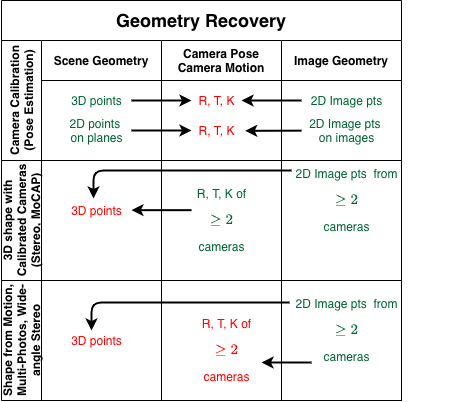

# 3D structure from multiple 2D views

* We will study the mathematics behind the recovery of 3D depth from multiple 2D images, *given the knowledge of intrinsic and extrinsic camera parameters*. 

* We will assume that we know the correspondences between 2D points for which we want to estimate the 3D locations.

* We can set up the estimation problem in two different ways. 

>>1. One possibility is to estimate the 3D locations to minimize the 3D errors.

>>2. The second possibility is to estimate the 3D locations of the points by minimizing the errors among the projected points on the image. 

* Some applications

>> 1. Multi-view camera scene observations. ([The WILDTRACK Seven-Camera HD Dataset](https://www.epfl.ch/labs/cvlab/data/data-wildtrack/))

>> 2. Virtual reality simulators, e.g. [Computer Assisted Rehabilitation Environment System (CAREN)](https://www.youtube.com/watch?v=a6Quza3WmVA))

>> 3. Motion Capture Studio ([MoCap Studio](http://motusdigital.com/motion-capture.htm)) 

Setup of a motion capture studio. Taken from https://www.youtube.com/watch?v=XIw9cZ8i4mE

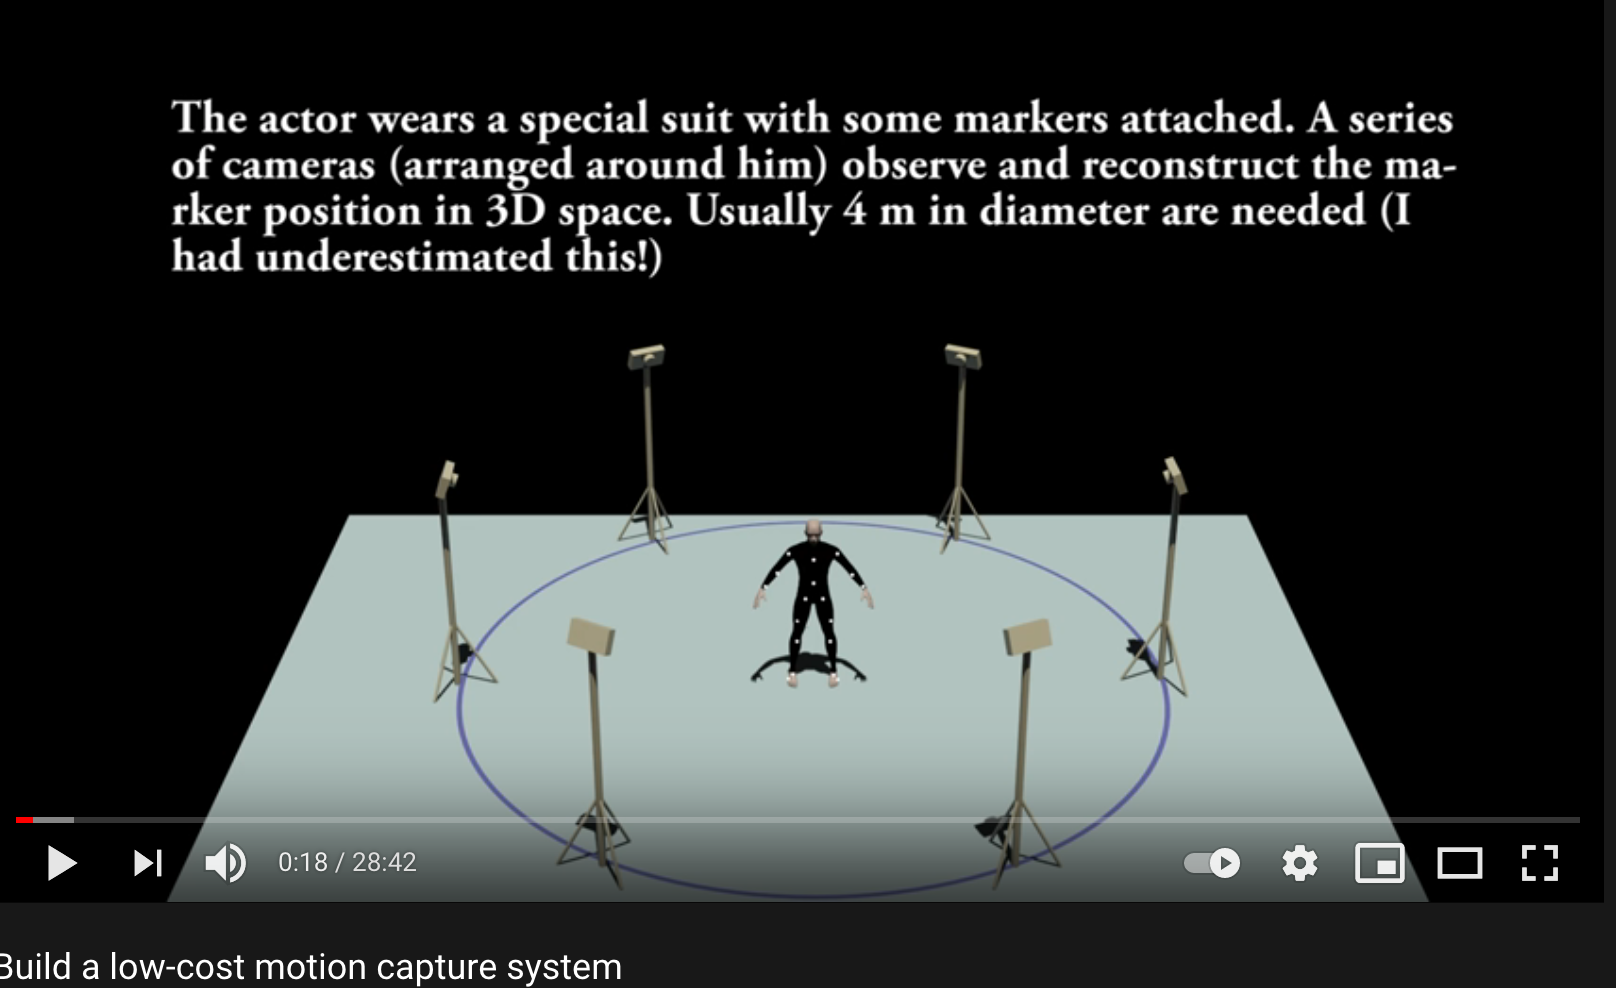

# Method 1: Minimize 3D residuals (errors)

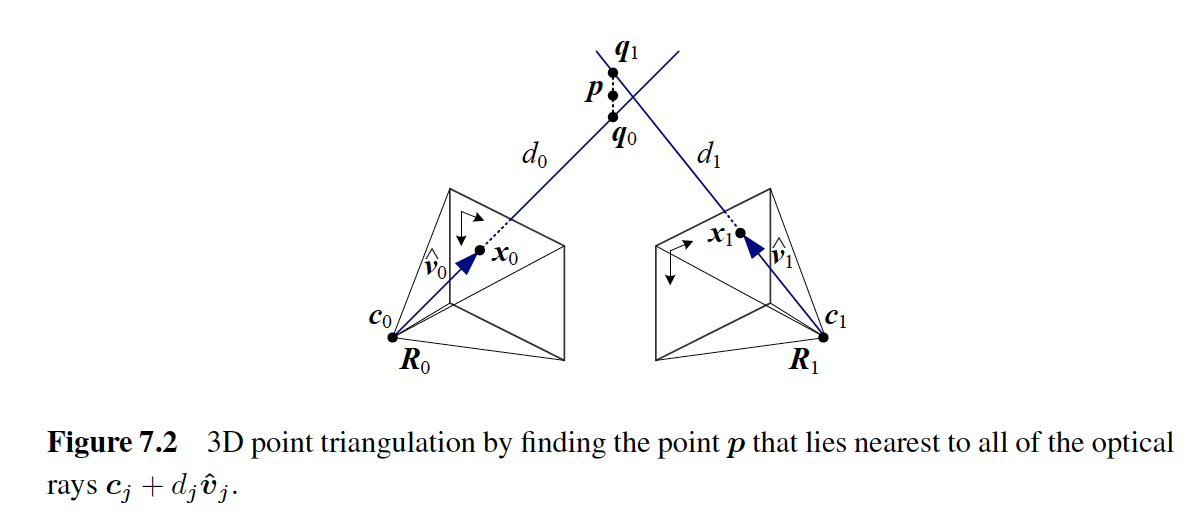

# Image coordinates in terms of 3D point location (in world coordinates)

* Assume calibrated cameras. Lens distortion has been removed. Use Fig 7.2 as illustration.

* We know that the homogeneous coordinate of an image pixel $(x_j, y_j)$ is related the 3D coordinates, which is unknown, as per the following equations. 

* **We assume that we have estimates of the intrinsic and extrinsic parameters.**
    
\begin{eqnarray} 
    \begin{bmatrix} 
    w_j x_j \\ w_j y_j \\ w_j 
    \end{bmatrix} & = & 
    \begin{bmatrix} 
    -f & 0 & c_x  & 0 \\ 
    0 & -af  & c_y & 0 \\
    0 & 0 & 1 & 0
    \end{bmatrix} 
    \begin{bmatrix} 
    r_{00} & r_{01} & r_{02} & t_x \\ 
    r_{10} & r_{11} & r_{12}  & t_y  \\
    r_{20} & r_{21} & r_{22} & t_z \\
    0 & 0 & 0  & 1
    \end{bmatrix} 
    \begin{bmatrix}
    X_p \\ Y_p \\ Z_p\\1
    \end{bmatrix} \\
    & = & 
    \begin{bmatrix} 
    -f & 0 & c_x \\ 
    0 & -af  & c_y \\
    0 & 0 & 1
    \end{bmatrix} 
    \begin{bmatrix} 
    r_{00} & r_{01} & r_{02} & t_x \\ 
    r_{10} & r_{11} & r_{12}  & t_y  \\
    r_{20} & r_{21} & r_{22} & t_z 
    \end{bmatrix} 
    \begin{bmatrix}
    X_p \\ Y_p \\ Z_p \\ 1
    \end{bmatrix}
\end{eqnarray}

# Expressing the 3D world coordinate of a point as a function of the image coordinates.
Let the image of the 3D point $\mathbf{p} = (X_p, Y_p, Z_p )$ be denoted by $\mathbf{x_j}$ in the $j$-th camera. The intrinsic and extrinsic parameters of the $j$-th camera are denoted by $\mathbf{K}_j$, $\mathbf{R}_j$, and $\mathbf{t}_j$,
    
\begin{eqnarray} 
\mathbf{\tilde{x}_j} & = & \mathbf{K}_j
\begin{bmatrix} \mathbf{R}_j & \mathbf{t}_j \end{bmatrix} \mathbf{\tilde{p}} \\
\mathbf{K}_j^{-1} \mathbf{\tilde{x}_j} & =  &
\begin{bmatrix} \mathbf{R}_j & \mathbf{t}_j \end{bmatrix} \mathbf{\tilde{p}}
\\
\mathbf{R}_j^T \mathbf{K}_j^{-1} \mathbf{\tilde{x}_j} & = &
\begin{bmatrix} \mathbf{I} & \mathbf{R}_j^T \mathbf{t}_j \end{bmatrix} \mathbf{\tilde{\tilde{p}}} \\
& = &
\begin{bmatrix} 
1 & 0 & 0 & (\mathbf{R}_j^T \mathbf{t}_j)[0] \\
0 & 1 & 0 & (\mathbf{R}_j^T \mathbf{t}_j)[1] \\
0 & 0 & 1 & (\mathbf{R}_j^T \mathbf{t}_j)[2] \\
 \end{bmatrix} 
\begin{bmatrix}
    X_p \\ Y_p \\ Z_p \\1
    \end{bmatrix} \\
& = &    
\begin{bmatrix} 
X_p +  (\mathbf{R}_j^T \mathbf{t}_j)[0] \\
Y_p +  (\mathbf{R}_j^T \mathbf{t}_j)[1] \\
Z_p +  (\mathbf{R}_j^T \mathbf{t}_j)[2] \\
 \end{bmatrix} \\
\mathbf{R}_j^T \mathbf{K}_j^{-1} \mathbf{\tilde{x}_j} & = & 
\mathbf{p} + \mathbf{R}_j^T \mathbf{t}_j
\end{eqnarray}


$\mathbf{c}_j = - \mathbf{R}_j^T \mathbf{t}_j$ is the vector from the world coordinate origin to the camera coordinate origin, specified with respect to the **world** coordinates. Note $\mathbf{t}_j$ is the vector pointing the other way, i.e. from camera origin to world origin, but specified with respect to the **camera** coordinates.

Using the above, we can rewrite the world coordinates as 
    
\begin{equation} 
    \mathbf{p} =  \mathbf{R}_j^T \mathbf{K}_j^{-1} \mathbf{\tilde{x}_j}  + \mathbf{c}_j 
\end{equation}

Please keep in mind that $\mathbf{p}$ is specified with respect to the world coordinates.
    
It appears that we have a closed form solution for the 3D location of the image point just from one equation, but that is not so! In the above equation, we have to specify the homogeneous coordinates of the image pixel location, $\mathbf{\tilde{x}_j}  = \begin{bmatrix} w_j x_j \\ w_j y_j \\ w_j   \end{bmatrix}^T$. We know $(x_j, y_j)$, the pixel location, but we do not know $w_j$. The point could be anywhere along the vector that start from the image coordinate origin and go through the image pixel $(x_j, y_j)$. Refer to Figure 7.2 in the textbook.

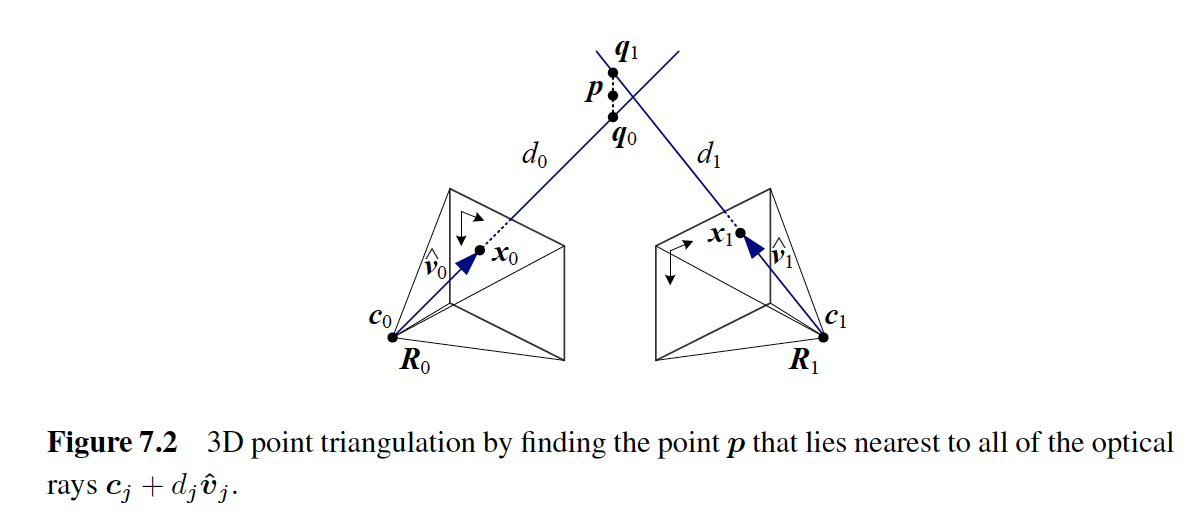

# 3D vector on which the 3D point lies for the $j$-th camera (expressed in world coordinates)

Re-writing the above equation using a compact notation.
    
\begin{equation} 
    \mathbf{p}  =  \mathbf{R}_j^T \mathbf{K}_j^{-1} \begin{bmatrix} w_j x_j \\ w_j y_j \\ w_j   \end{bmatrix}  + \mathbf{c}_j 
\end{equation}
    
\begin{equation} 
    \mathbf{p}  =  w_j  \mathbf{R}_j^T \mathbf{K}_j^{-1} \begin{bmatrix} x_j \\ y_j \\ 1   \end{bmatrix}  + \mathbf{c}_j 
\end{equation}
    
\begin{equation} 
  \mathbf{p}  =  d_j  \mathbf{\hat{v}}_j \ + \mathbf{c}_j 
\end{equation}
    
where $\mathbf{\hat{v}}_j$ is the normalized unit vector, along $\mathbf{R}_j^T \mathbf{K}_j^{-1} \begin{bmatrix} x_j \\ y_j \\ 1   \end{bmatrix}$, representing the vector through the image pixel, with respect to the **world** coordinates. We denote it by
    
\begin{equation} 
\mathbf{\hat{v}}_j = \mathcal{N}(\mathbf{R}_j^T \mathbf{K}_j^{-1} \mathbf{x}_j)
\end{equation}

# The residual (error) of $j$-th point

The residual vector $\mathbf{r}_j$ is the given by 
    
\begin{eqnarray} 
    \mathbf{r}_j  & = & (d_j  \mathbf{\hat{v}}_j - \mathbf{c}_j) - \mathbf{p} \\
    & = & d_j  \mathbf{\hat{v}}_j  - (\mathbf{p}  - \mathbf{c}_j)
\end{eqnarray}
    
This is the vector connecting the lines through the image pixel and the vector to the 3D world coordinate, with respect to the **camera** coordinates, which is $(\mathbf{p}  - \mathbf{c}_j)$. Use Figure 7.2 to illustrate this.
    
The total residual over N-cameras is given by 
    
\begin{equation} 
    \sum_{j=1}^N ||{\mathbf{r}_j}||^2  = \sum_{j=1}^N  (d_j  \mathbf{\hat{v}}_j  - (\mathbf{p}  - \mathbf{c}_j))^T (d_j  \mathbf{\hat{v}}_j  - (\mathbf{p}  - \mathbf{c}_j))
\end{equation}

There are (N+3) unknowns: distances with respect to the $N$ cameras $d_j$'s, and the three world coordinates in $\mathbf{p}$.

# Minimize the total residual.

The unknowns are the depths from each of the cameras, $d_j$'s, and the coordinate of the 3D point, $\mathbf{p}$. We will derive the minimization conditions in two steps.

1. First, we will take derivative of the total residual with respect to $d_j$ and set it to zero.
    
\begin{eqnarray} 
\frac{\partial}{\partial d_j} (d_j  \mathbf{\hat{v}}_j  + \mathbf{c}_j  - \mathbf{p})^T (d_j  \mathbf{\hat{v}}_j  + \mathbf{c}_j  - \mathbf{p}) & = &  0 \\
2 (\mathbf{\hat{v}}_j)^T (d_j  \mathbf{\hat{v}}_j \ + \mathbf{c}_j  - \mathbf{p})
& = &  0 \\
d_j + \mathbf{\hat{v}}_j^T (\mathbf{c}_j  - \mathbf{p})
& = &  0 \\
d_j & = &  \mathbf{\hat{v}}_j^T (\mathbf{p} - \mathbf{c}_j)
\end{eqnarray}

>> Use Figure 7.2 in the textbook to trace out the geometry of the above equation.

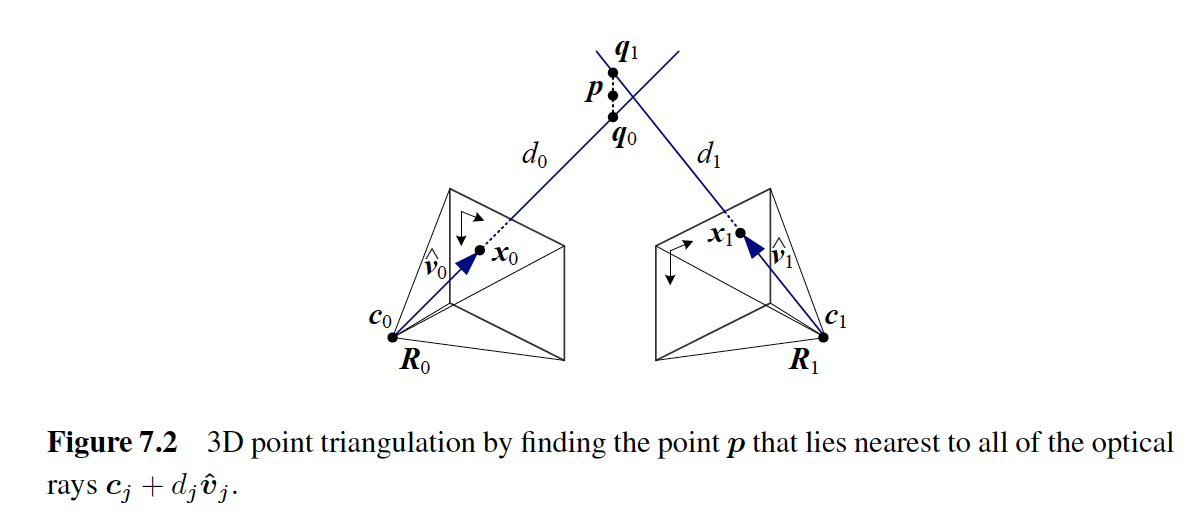

>> Plugging this back into the residual equation, we have a new expression of the residual that does not involve $d_j$.

\begin{eqnarray} 
     \sum_{j=1}^N || \mathbf{r}_j||^2  & = & \sum_{j=1}^N  || ( \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T (\mathbf{p} - \mathbf{c}_j) \ - (\mathbf{p}  - \mathbf{c}_j))||^2
     \\
       & = & \sum_{j=1}^N  ( (\mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) (\mathbf{p} - \mathbf{c}_j))^T 
     ( (\mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) (\mathbf{p} - \mathbf{c}_j))
      \\
\end{eqnarray}

2. Second, we take the derivative of the above residual expression with respect to $\mathbf{p}$ and set it to zero.

\begin{eqnarray} 
     \sum_{j=1}^N  ( \mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)^T 
     ( (\mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) (\mathbf{p} - \mathbf{c}_j)) & = 0
      \\
      \sum_{j=1}^N  ( \mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)
     (\mathbf{I} - \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) (\mathbf{p} - \mathbf{c}_j) & = 0
      \\
      \sum_{j=1}^N  ( \mathbf{I} - 2 \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T
      + \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)
     (\mathbf{p} - \mathbf{c}_j) & = 0
      \\
      \sum_{j=1}^N  ( \mathbf{I} -  \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)
     (\mathbf{p} - \mathbf{c}_j) & = 0
      \\
      \\
      \left ( \sum_{j=1}^N  ( \mathbf{I} -  \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) \right )
     \mathbf{p} - \sum_{j=1}^N  ( \mathbf{I} -  \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)  \mathbf{c}_j  & = 0 
      \end{eqnarray}
    

# The solution (in closed form)

The least square estimate of the 3D location of the point is given by 
\begin{equation}
\mathbf{p} = \left ( \sum_{j=1}^N  ( \mathbf{I} -  \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T) \right )^{-1}
\sum_{j=1}^N  ( \mathbf{I} -  \mathbf{\hat{v}}_j \mathbf{\hat{v}}_j^T)  \mathbf{c}_j  
\end{equation}

**This equation is valid only when we have more than one camera.** For one camera, we get a degenerate solution where $\mathbf{p} = \mathbf{c}_j$, i.e. the point is located at the camera origin!


# Method 2: Minimize 2D residuals (on the image)

Minimizing 2D residuals can produce significantly better estimates if many of the cameras are closer to the 3D points than others, i.e. the points are distributed widely in 3D space.

1. Write the 3D to 2D projective equations for the two cameras using the $\mathbf{P}$ matrix.

2. What are the known and the unknowns?

3. Write the expression for the residual to be minimized.

4. Since the residual is non-linear with respect to the unknowns, we have to adopt non-linear least square estimation strategy. Given the parameters at iteration $k$, $ \mathbf{p}(k)$, we have to add $\Delta \mathbf{p}$ to it so that the residual is minimized. Write the expression of the residual as a function of  $\Delta \mathbf{p}$ using the Taylor series expansion.
    
5. Write the expression for the Jacobian.
    
6. What is the linear equation that will be solved at each step in terms of the Hessian?
    
7. What is the rank of Hessian? What is the minimum number of cameras you would need?
    
8. How can you initialize the whole process? Write the DLT form of the estimation problem.
    
9. What are the different options for solving the DLT form? Which one would you prefer?

10. All the above was for ONE 3D point. Think about how the equations would change if we have $K$ 3D points to estimate.
    

1. Write the 3D to 2D projective equations for the two cameras using the $\mathbf{P}$ matrix.

\begin{eqnarray}
    \mathbf{\tilde{x}_j} = \mathbf{K}_j
    \begin{bmatrix} \mathbf{R}_j & \mathbf{t}_j \end{bmatrix} \mathbf{\tilde{p}} = \mathbf{P}_j \mathbf{\tilde{p}} & = & 
    \begin{bmatrix}
    p^j_{00} & p^j_{01} & p^j_{02} & p^j_{03} \\
    p^j_{10} & p^j_{11} & p^j_{12} & p^j_{13} \\
    p^j_{20} & p^j_{21} & p^j_{22} & p^j_{23} \\
    \end{bmatrix}
    \begin{bmatrix}
    X \\ Y \\ Z \\ 1
    \end{bmatrix}\\
    x_j = f_x(\mathbf{P}^j; \mathbf{p}) & = &
    \frac{p^j_{00} X  + p^j_{01} Y +  p^j_{02} Z + p^j_{03}}
    {p^j_{20} X  + p^j_{21} Y +  p^j_{22} Z + p^j_{23}} \\
    y_j = f_y(\mathbf{P}^j; \mathbf{p}) & = &
    \frac{p^j_{10} X  + p^j_{11} Y +  p^j_{12} Z + p^j_{13}}
    {p^j_{20} X  + p^j_{21} Y +  p^j_{22} Z + p^j_{23}}
\end{eqnarray}




2. What are the known and the unknowns?

>> Here the entries of the projection matrix are known and the homogeneous coordinates of the 3D point are unknown. 

2. Write the expression for the residual to be minimized.

>> The total residual, which is a function of the 3D point coordinates with respect to the world, is given by

\begin{eqnarray}
    r_{total}(\mathbf{p}) & = & \sum_{j=1}^{N} 
    ||\mathbf{x}_j - \mathbf{f}(\mathbf{P}^j; \mathbf{p})||^2 \\
\end{eqnarray}

>> The unknown is the vector $\mathbf{p} = \begin{bmatrix} X\\Y\\Z \end{bmatrix}$. 


4. Since the residual is non-linear with respect to the unknowns, we have to adopt non-linear least square estimation strategy. Given the parameters at iteration $k$, $ \mathbf{p}(k)$, we have to add $\Delta \mathbf{p}$ to it so that the residual is minimized. Write the expression of the residual as a function of  $\Delta \mathbf{p}$ using the Taylor series expansion.
    
>> Let the estimate of this vector at iteration $k$ be denoted by $\mathbf{p}(k)$. Then we want to find a change in this vector, denoted by $\Delta \mathbf{p}(k)$ such that the residual with $\mathbf{p} (k+1) = \mathbf{p}(k) + \Delta \mathbf{p} $ is minimized.
    
>> The total image residual for $N$ cameras is given by
    
\begin{eqnarray}
    E_{NLS}^{(k)}(\Delta \mathbf{p}) & = & \sum_{j=1}^{N} 
    ||\mathbf{x}_j - \mathbf{f}(\mathbf{P}^j; \mathbf{p}(k) + \Delta \mathbf{p} )||^2 \\
& \approx & \sum_{j=1}^{N} 
    ||\mathbf{x}_j - \mathbf{f}(\mathbf{P}^j; \mathbf{p}(k)) + 
    \frac{\partial \mathbf{f}(\mathbf{P}^j; \mathbf{p} (k))}{\partial \mathbf{p}}  \Delta \mathbf{p}||^2 \\
& \approx & \sum_{j=1}^{N} 
    ||\mathbf{J} (\mathbf{P}^j; \mathbf{p} (k))  \Delta \mathbf{p} - \mathbf{r}_j(k)||^2
\end{eqnarray}
    
>> where $\mathbf{J}$ is the Jacobian for the $k$-iteration and $\mathbf{r}_j(k)$is the residual at the $k$-iteration.

5. Write the expression for the Jacobian.
    
>> The Jacobian is 2 by 3 and are given by the entries
    
\begin{equation}
\mathbf{J}^j = 
\begin{bmatrix}
\frac{\partial f_x}{\partial X} & \frac{\partial f_x}{\partial Y} & 
\frac{\partial f_x}{\partial Z} \\
\frac{\partial f_y}{\partial X} & \frac{\partial f_y}{\partial Y} & 
\frac{\partial f_y}{\partial Z} \\
\end{bmatrix}
\end{equation}
    
>>Let $D(k) = p^j_{20} X(k)  + p^j_{21} Y(k) +  p^j_{22} Z(k) + p^j_{23}$ be the denominator at  the $k$-th iteration. 
    
\begin{eqnarray}
    \frac{\partial f_x}{\partial X} & = & \frac{1}{D(k)} (p_{00}^j - p^j_{20} x_j) \\
    \frac{\partial f_x}{\partial Y} & = & \frac{1}{D(k)} (p_{01}^j - p^j_{21} x_j) \\
    \frac{\partial f_x}{\partial Z} & = & \frac{1}{D(k)} (p_{02}^j - p^j_{22} x_j) \\
    \frac{\partial f_y}{\partial X} & = & \frac{1}{D(k)} (p_{10}^j - p^j_{20} y_j) \\
    \frac{\partial f_y}{\partial Y} & = & \frac{1}{D(k)} (p_{11}^j - p^j_{21} y_j) \\
    \frac{\partial f_y}{\partial Z} & = & \frac{1}{D(k)} (p_{12}^j - p^j_{22} y_j) \\
\end{eqnarray}
    

6. What is the linear equation that will be solved at each step in terms of the Hessian?

>> Solve the following linear equation
    
\begin{equation}
\mathbf{A} \Delta \mathbf{p} = \mathbf{b}
\end{equation}
    
>>>>>where $\mathbf{A}= \sum_j (\mathbf{J}^j)^T (\mathbf{J}^j)$ and $\mathbf{b} = \sum_j (\mathbf{J}^j)^T (r_j(k))$. 

\begin{equation}
\mathbf{p} (k+1) = \mathbf{p}(k) + \Delta \mathbf{p}
\end{equation}

> Recompute Jacobian and then the next change in parameters. Repeat until change in residual is small.

7. What is the rank of Hessian? What is the minimum number of cameras you would need?

 * Unique solution exists only if the rank of the 3 by 3 Hessian $\mathbf{A}$ is 3. 

 * Rank contribution from one camera $\text{Rank}((\mathbf{J}^j)^T (\mathbf{J}^j)) = 2$. Can you explain why?

 * $\text{Rank}(\mathbf{A}+\mathbf{B}) \le \text{Rank}(\mathbf{A})+ \text{Rank}(\mathbf{B})$.

 * So, we would need at least two cameras to infer the depth of one point. This is also what we expect from commonsense. It is impossible to infer depth one point just from one view.

8. How can you initialize the whole process? Write the DLT form of the estimation problem.
 
\begin{equation}
    \begin{bmatrix}
    \vdots & \vdots &\vdots &\vdots \\
    \vdots & \vdots &\vdots &\vdots \\
    (p_{20}^j x_j - p_{00}^j) & (p_{21}^j x_j - p_{01}^j) & 
    (p_{22}^j x_j - p_{02}^j) & (p_{23}^j x_j - p_{03}^j)  \\
    (p_{20}^j y_j - p_{00}^j) & (p_{21}^j y_j - p_{01}^j) & 
    (p_{22}^j Y_j - p_{02}^j) & (p_{23}^j y_j - p_{03}^j)  \\
    \vdots & \vdots &\vdots &\vdots  \\
    \vdots & \vdots &\vdots &\vdots  \\
    \end{bmatrix}
    \begin{bmatrix}
X \\ Y \\ Z \\ W
\end{bmatrix} = 0
\end{equation}

9. What are the different options for solving the DLT form? Which one would you prefer?

> It is best if we keep the fourth components of homogeneous coordinate of the 3D point, $W$, as an unknown. Do SVD of the left side matrix and pick the vector corresponding to the smallest singular value as the estimate of the homogeneous coordinate. Normalize by the last element to obtain an estimate of the coordinates.

> To form this estimate, we need at least two cameras, which results in 4 rows in of the DLT matrix above to estimate the 4 unknowns.



# Worksheet 
10. All the above was for ONE 3D point. Think about how the equations would change if we have $K$ 3D points to estimate.

# Example: WILDTRACK dataset

"[WILDTRACK: A Multi-Camera HD Dataset for Dense Unscpted Pedestrian Detection](https://openaccess.thecvf.com/content_cvpr_2018/html/Chavdarova_WILDTRACK_A_Multi-Camera_CVPR_2018_paper.html)," Tatjana Chavdarova, Pierre Baqué, Stéphane Bouquet, Andrii Maksai, Cijo Jose, Timur Bagautdinov, Louis Lettry, Pascal Fua, Luc Van Gool, François Fleuret; Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2018, pp. 5030-5039 

The full dataset is available at https://www.epfl.ch/labs/cvlab/data/data-wildtrack/


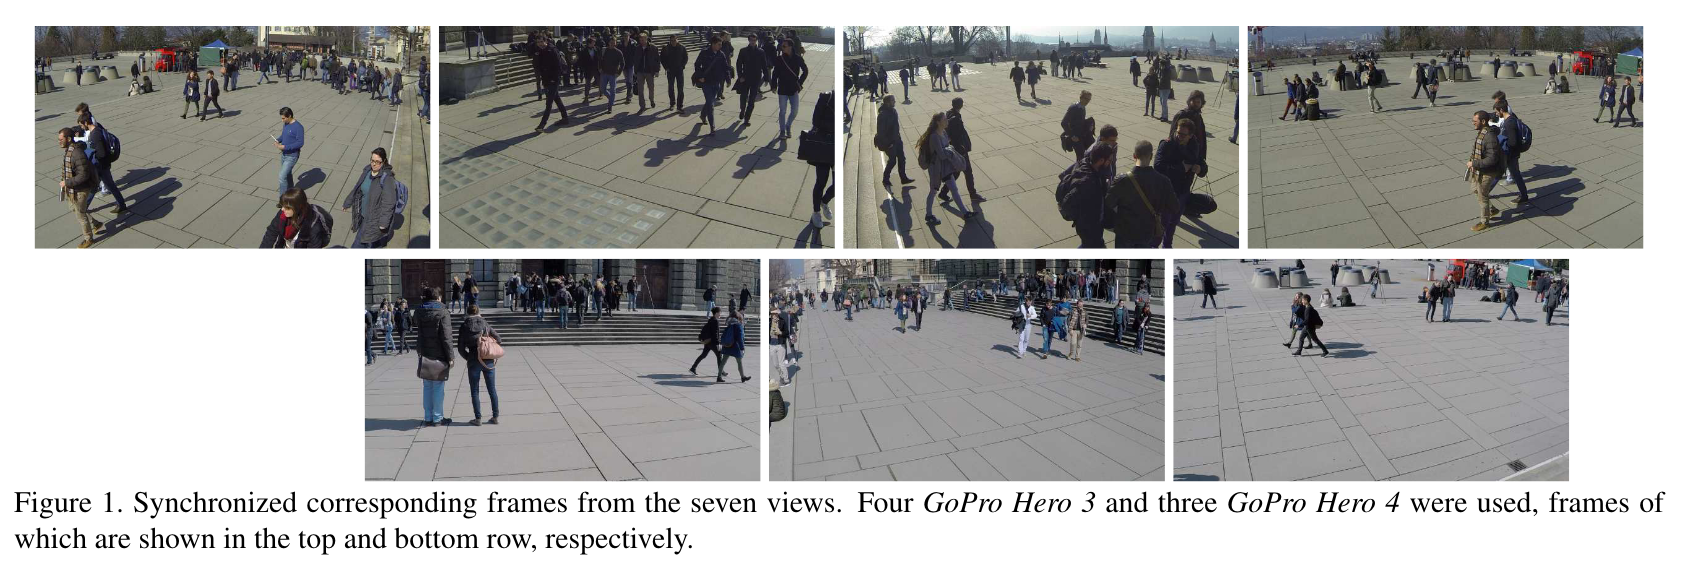

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Colab\ Notebooks/data/

Mounted at /content/drive
 0005_Walking001.xlsx			    left01.jpg	 MOT16-08-raw.webm
 0008_ChaCha001.xlsx			    left02.jpg	 mountain_peak_1.png
 2011_09_26_drive_0001_extract		    left03.jpg	 mountain_peak_2.png
'Armes 1.png'				    left04.jpg	 parking_lot_meva_1.png
'Armes 2.png'				    left05.jpg	 parking_lot_meva_2.png
 blog_danforth_monica_mural_panorama.jpg    left06.jpg	 parking_lot_meva_3.png
 blog_monica_mural_brown_white.jpg	    left07.jpg	 semper
 blog_monica_mural_fish_tree_windows1.jpg   left08.jpg	'Superbowl 2021_1.png'
 hawaii.png				    left09.jpg	'Superbowl 2021_2.png'
 house_1.png				    left11.jpg	'Superbowl 2021_3.png'
 house_2.png				    left12.jpg	 window_1.png
 house_facade.png			    lizard.jpg	 window_2.png


In [ ]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import scipy.ndimage as scimage
from skimage.transform import warp
import torch.nn as nn
from skimage import io

!pip install opencv-contrib-python==4.4.0.44
import cv2
print (cv2 .__version__)


np.set_printoptions(precision=2, suppress=True)
torch.set_printoptions(precision=2, sci_mode=False)

     |████████████████████████████████| 55.7MB 78kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
4.4.0


# Code: Detect and match SIFT keypoints between N images

In [10]:
def detect_and_match_keypoints (image_list) :
    # input is a list of k images
    # returns SIFT key points and descriptors for each image along with sorted k-matchlist (plus k-list of point matching coordinates) 

    n_best = 100
    print("Input image size:", images[0].shape)

    # SIFT with default parameters
    sift = cv2.SIFT_create(nOctaveLayers = 3, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6)
    keypoints = []
    descriptors = []
    for i in range (len(images)) :
        print('Detecting SIFT features in image-{}', i+1)
        kp, desc = sift.detectAndCompute(images[i], None)
        keypoints.append(kp)
        descriptors.append(desc)

    # FEATURE MATCHING
    bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
    matches = []
    match_matrix = np.zeros((len(images), n_best, n_best))
    for i in range (len(images)) :
        match = bf.match(descriptors[i], descriptors[(i+1)%len(images)])
        match = sorted(match, key = lambda x:x.distance)
        matches.append(match)
        for j in range(n_best) :
            match_matrix[i, matches[i][j].queryIdx, matches[i][j].trainIdx] = 1
    chain_mat = match_matrix[0,:,:]
    for i in range (1, len(images)) :
        chain_mat = chain_mat @ match_matrix[i,:,:] 
    print(np.diag(chain_mat))

    X_1 = []
    X_2 = []
    for i in range(len(matches)) :
        X_1.append([keypoints_1[matches[i].queryIdx].pt[0], keypoints_1[matches[i].queryIdx].pt[1]])
        X_2.append([keypoints_2[matches[i].trainIdx].pt[0], keypoints_2[matches[i].trainIdx].pt[1]])
    X_1 = np.array(X_1)
    X_2 = np.array(X_2)

    return(X_1, X_2, keypoints_1, keypoints_2, matches)